<a href="https://colab.research.google.com/github/sushmitha6145/CodersCave/blob/main/Phase2_NormalTask_Climate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Dataset](https://www.kaggle.com/datasets/die9origephit/temperature-data-albany-new-york)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
daily_data = pd.read_csv("/content/daily_data.csv")
hourly_data = pd.read_csv("/content/hourly_data.csv", low_memory=False)
monthly_data = pd.read_csv("/content/monthly_data.csv")
three_hour_data = pd.read_csv("/content/three_hour_data.csv")


In [21]:
for i, data in enumerate([daily_data, hourly_data, monthly_data, three_hour_data]):
    print(f"\nDataset {i+1} Info:")
    print(data.head())
    print(data.info())
    print(data.describe())



Dataset 1 Info:
       STATION                DATE REPORT_TYPE  SOURCE BackupElements  \
0  72518014735 2015-01-01 23:59:00       SOD         6         PRECIP   
1  72518014735 2015-01-02 23:59:00       SOD         6         PRECIP   
2  72518014735 2015-01-03 23:59:00       SOD         6         PRECIP   
3  72518014735 2015-01-04 23:59:00       SOD         6         PRECIP   
4  72518014735 2015-01-05 23:59:00       SOD         6         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   
2              260         PLASTIC         42.6918        -73.83109   
3              260         PLASTIC         42.6918        -73.83109   
4              260         PLASTIC         42.6918        -73.83109   

       BackupName  ...  DailyPeakWindDirection  DailyPeakWindSpeed  \
0  NWS ALBANY, NY  ...                   190.0 

In [3]:
# Preprocess daily data
daily_data['DATE'] = pd.to_datetime(daily_data['DATE'])
daily_data.dropna(inplace=True)
daily_data.set_index('DATE', inplace=True)

# Preprocess hourly data
hourly_data['DATE'] = pd.to_datetime(hourly_data['DATE'])
hourly_data.dropna(inplace=True)
hourly_data.set_index('DATE', inplace=True)

# Preprocess monthly data
monthly_data['DATE'] = pd.to_datetime(monthly_data['DATE'])
monthly_data.dropna(inplace=True)
monthly_data.set_index('DATE', inplace=True)

# Preprocess three hour data
three_hour_data['DATE'] = pd.to_datetime(three_hour_data['DATE'])
three_hour_data.dropna(inplace=True)
three_hour_data.set_index('DATE', inplace=True)


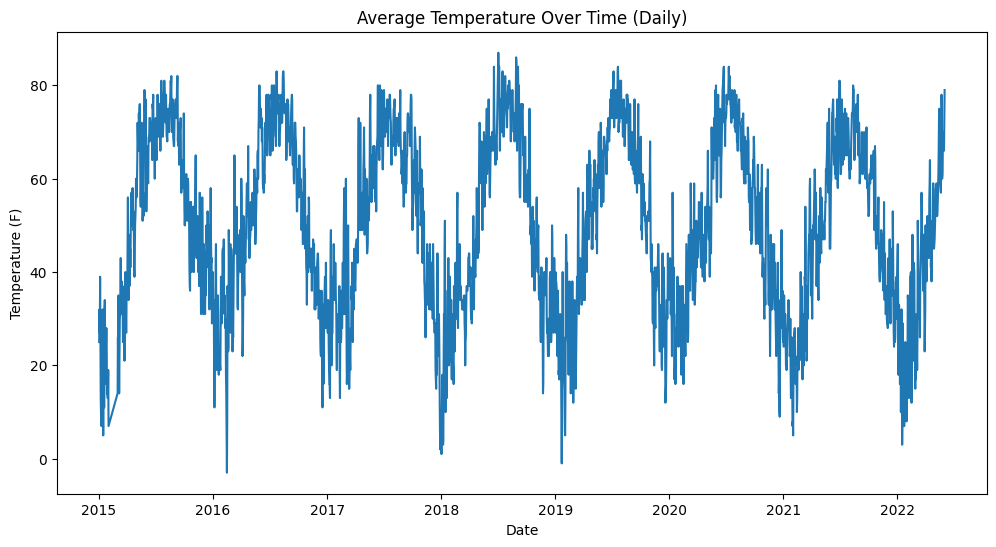

In [4]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_data, x=daily_data.index, y='DailyAverageDryBulbTemperature')
plt.title('Average Temperature Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()




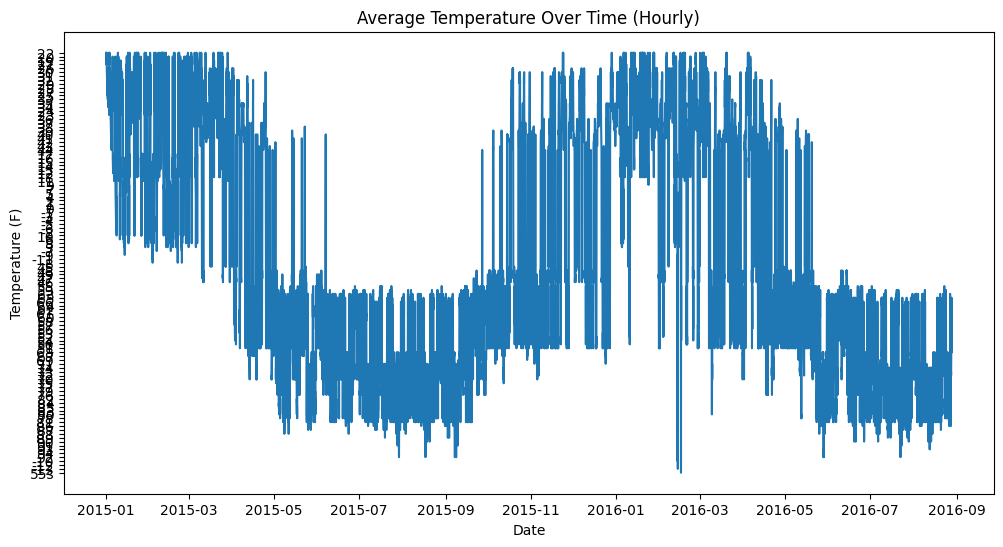

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_data, x=hourly_data.index, y='HourlyDryBulbTemperature')
plt.title('Average Temperature Over Time (Hourly)')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()


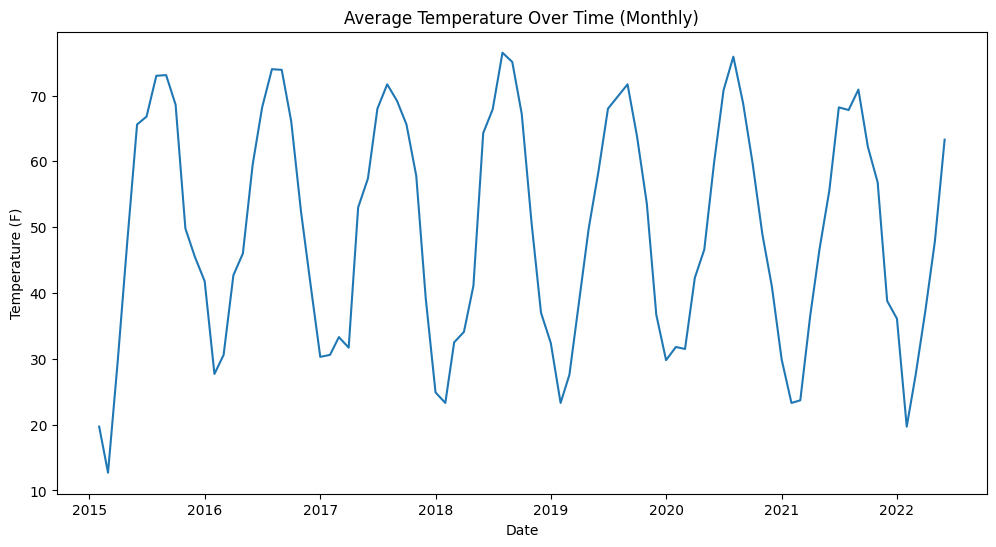

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x=monthly_data.index, y='MonthlyMeanTemperature')
plt.title('Average Temperature Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()


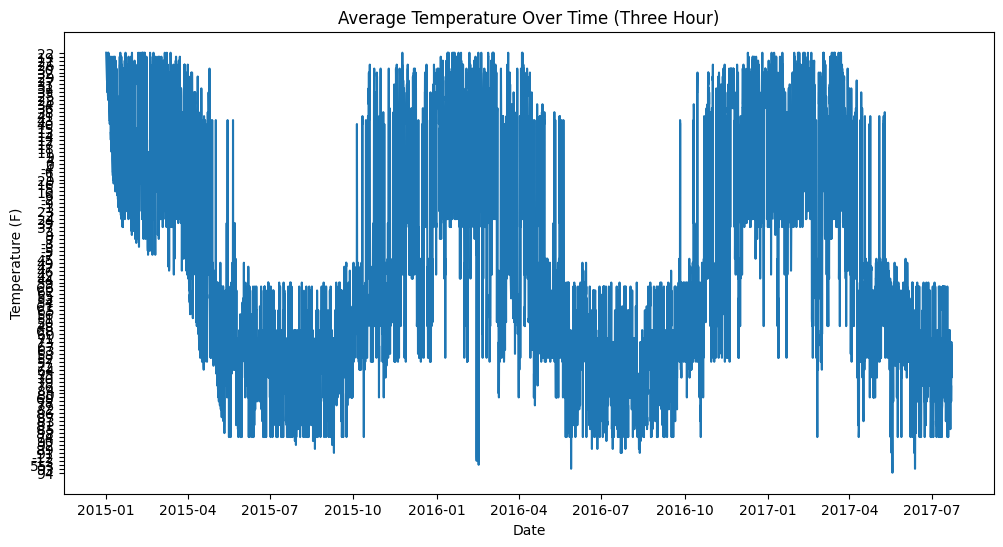

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=three_hour_data, x=three_hour_data.index, y='HourlyDryBulbTemperature')
plt.title('Average Temperature Over Time (Three Hour)')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()


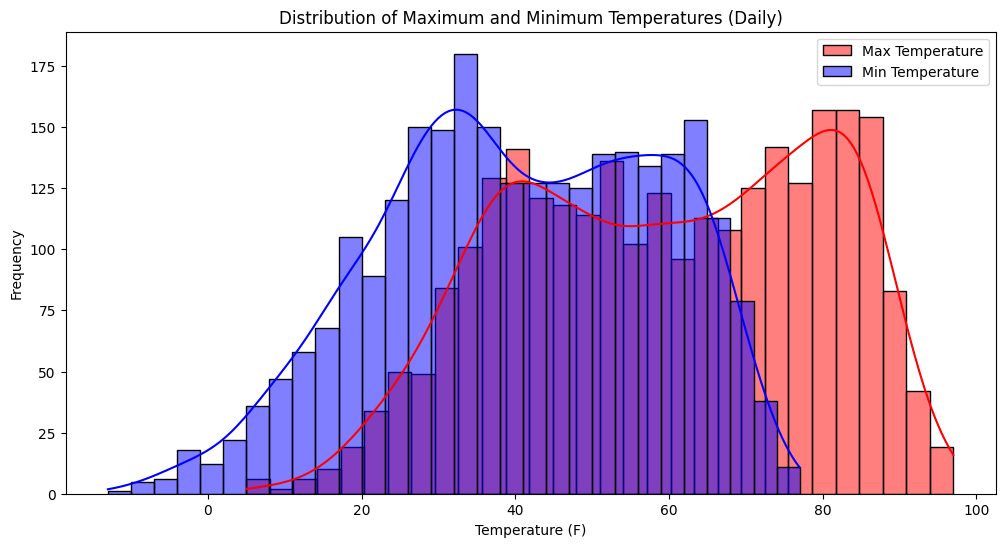

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(daily_data['DailyMaximumDryBulbTemperature'], bins=30, kde=True, color='red', label='Max Temperature')
sns.histplot(daily_data['DailyMinimumDryBulbTemperature'], bins=30, kde=True, color='blue', label='Min Temperature')
plt.title('Distribution of Maximum and Minimum Temperatures (Daily)')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend()
plt.show()




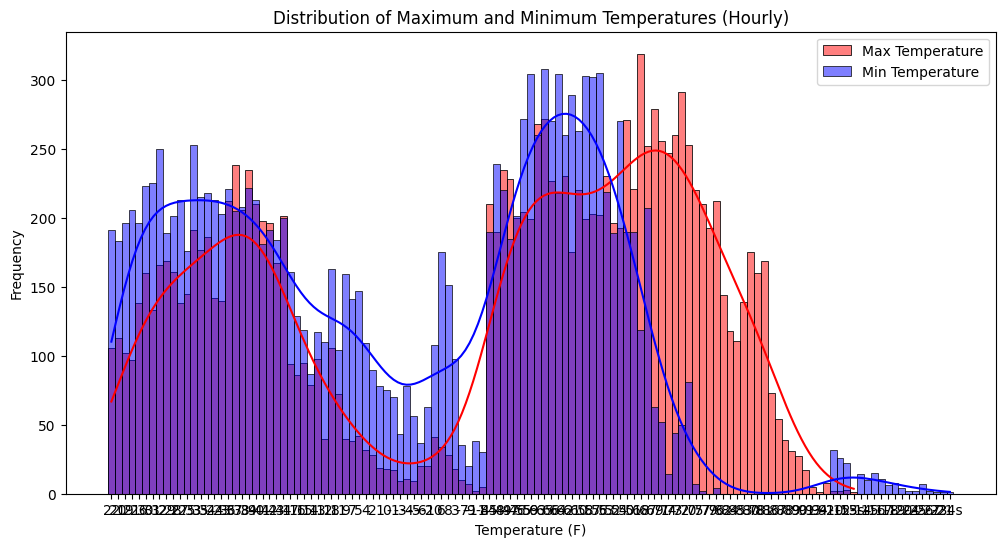

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(hourly_data['HourlyDryBulbTemperature'], bins=30, kde=True, color='red', label='Max Temperature')
sns.histplot(hourly_data['HourlyDewPointTemperature'], bins=30, kde=True, color='blue', label='Min Temperature')
plt.title('Distribution of Maximum and Minimum Temperatures (Hourly)')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


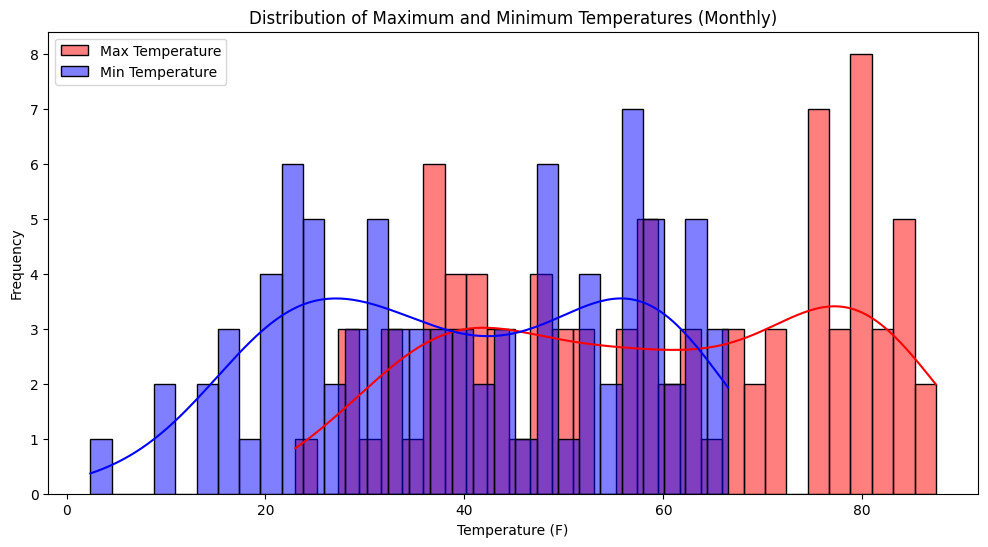

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(monthly_data['MonthlyMaximumTemperature'], bins=30, kde=True, color='red', label='Max Temperature')
sns.histplot(monthly_data['MonthlyMinimumTemperature'], bins=30, kde=True, color='blue', label='Min Temperature')
plt.title('Distribution of Maximum and Minimum Temperatures (Monthly)')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


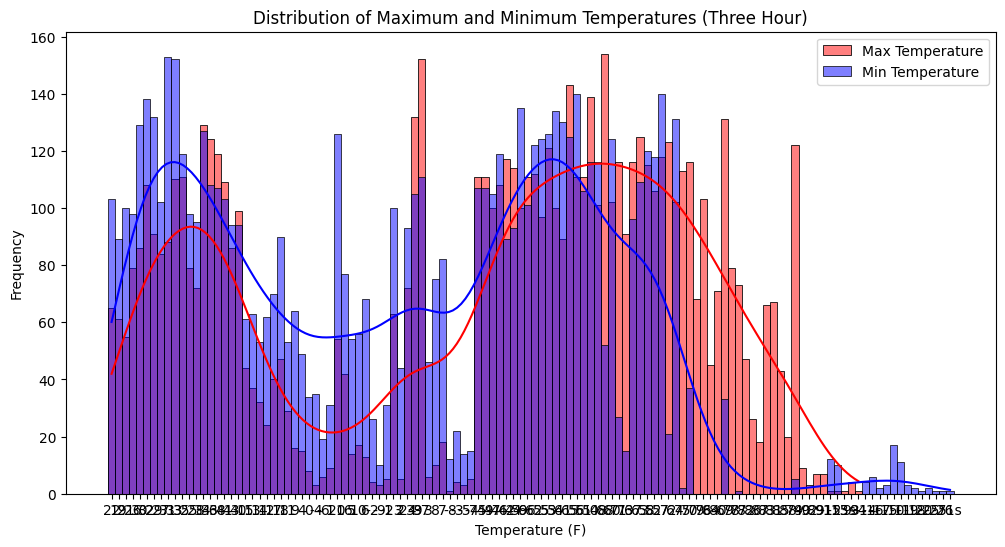

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(three_hour_data['HourlyDryBulbTemperature'], bins=30, kde=True, color='red', label='Max Temperature')
sns.histplot(three_hour_data['HourlyDewPointTemperature'], bins=30, kde=True, color='blue', label='Min Temperature')
plt.title('Distribution of Maximum and Minimum Temperatures (Three Hour)')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


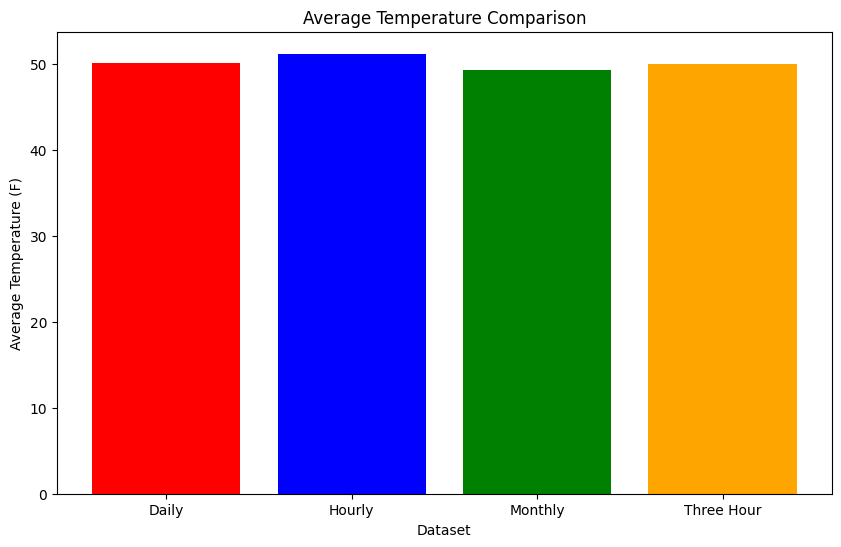

In [15]:
import numpy as np

plt.figure(figsize=(10, 6))

# Filter out non-numeric values and convert to float
temp_daily = daily_data['DailyAverageDryBulbTemperature']
temp_hourly = hourly_data['HourlyDryBulbTemperature']
temp_monthly = monthly_data['MonthlyMeanTemperature']
temp_three_hour = three_hour_data['HourlyDryBulbTemperature']

# Function to convert to float or NaN if conversion fails
def convert_to_float(x):
    try:
        return float(x)
    except ValueError:
        return np.nan

temp_daily = temp_daily.apply(convert_to_float)
temp_hourly = temp_hourly.apply(convert_to_float)
temp_monthly = temp_monthly.apply(convert_to_float)
temp_three_hour = temp_three_hour.apply(convert_to_float)

# Plotting the bar plot
plt.bar(['Daily', 'Hourly', 'Monthly', 'Three Hour'], [temp_daily.mean(), temp_hourly.mean(), temp_monthly.mean(), temp_three_hour.mean()], color=['red', 'blue', 'green', 'orange'])
plt.title('Average Temperature Comparison')
plt.xlabel('Dataset')
plt.ylabel('Average Temperature (F)')
plt.show()
